In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\TipJoke.csv')
df.head()

,Unnamed: 0,Card,Tip,Ad,Joke,None
0,1,None,1,0,0,1
1,2,Joke,1,0,1,0
2,3,Ad,0,1,0,0
3,4,None,0,0,0,1
4,5,None,1,0,0,1


In [161]:
# Dropping unnecessary column

df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Card,Tip,Ad,Joke,None
0,None,1,0,0,1
1,Joke,1,0,1,0
2,Ad,0,1,0,0
3,None,0,0,0,1
4,None,1,0,0,1


#### Let's analyze data

In [12]:
# Balanced dataset
df['Card'].value_counts()

Ad      74
Joke    72
None    65
Name: Card, dtype: int64

In [18]:
for i in df.columns:
    print(f"Exploring columns in {i}")
    print(df[i].value_counts())

Exploring columns in Card
Ad      74
Joke    72
None    65
Name: Card, dtype: int64
Exploring columns in Tip
0    151
1     60
Name: Tip, dtype: int64
Exploring columns in Ad
0    137
1     74
Name: Ad, dtype: int64
Exploring columns in Joke
0    139
1     72
Name: Joke, dtype: int64
Exploring columns in None
0    146
1     65
Name: None, dtype: int64


In [56]:
df[df['Card'] == 'Joke']['Tip'].value_counts().sum()

print(df[df['Card'] == 'Joke']['Tip'].value_counts()[1]/df[df['Card'] == 'Joke']['Tip'].value_counts().sum())

0.4166666666666667


In [57]:
df[df['Card'] == 'Ad']['Tip'].value_counts()
print(df[df['Card'] == 'Ad']['Tip'].value_counts()[1]/df[df['Card'] == 'Ad']['Tip'].value_counts().sum())

0.1891891891891892


In [58]:
df[df['Card'] == 'None']['Tip'].value_counts()
print(df[df['Card'] == 'None']['Tip'].value_counts()[1]/df[df['Card'] == 'None']['Tip'].value_counts().sum())

0.24615384615384617


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Card    211 non-null    object
 1   Tip     211 non-null    int64 
 2   Ad      211 non-null    int64 
 3   Joke    211 non-null    int64 
 4   None    211 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.4+ KB


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [99]:
from sklearn.metrics import accuracy_score, classification_report

In [163]:
labels, uniques = pd.factorize(df['Card'])
df['Card'] = labels

df

,Card,Tip,Ad,Joke,None
0,0,1,0,0,1
1,1,1,0,1,0
2,2,0,1,0,0
3,0,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
206,2,0,1,0,0
207,1,0,0,1,0
208,2,0,1,0,0
209,1,0,0,1,0


In [65]:
df.drop(['Card'], axis = 1, inplace = True)


,Tip,Ad,Joke,None
0,1,0,0,1
1,1,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
206,0,1,0,0
207,0,0,1,0
208,0,1,0,0
209,0,0,1,0


- 0 - None
- 1 - Joke
- 2 - Ad

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Tip'], axis = 1), df['Tip'], random_state= 32, test_size= 0.3)

In [70]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_pred = dtree.predict(X_test)

In [90]:
print(accuracy_score(y_test, y_pred))

0.671875


In [91]:
print(confusion_matrix(y_test, y_pred))

[[43  0]
 [21  0]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

,Ad,Joke,None
180,0,0,1
167,1,0,0
27,0,1,0
85,1,0,0
79,1,0,0
...,...,...,...
86,0,0,1
114,1,0,0
189,1,0,0
40,0,1,0


In [164]:
df

,Card,Tip,Ad,Joke,None
0,0,1,0,0,1
1,1,1,0,1,0
2,2,0,1,0,0
3,0,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
206,2,0,1,0,0
207,1,0,0,1,0
208,2,0,1,0,0
209,1,0,0,1,0


In [178]:
X = df[['Ad', 'Joke', 'None']]
y = df['Tip']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [183]:
y_pred = decision_tree.predict(np.array(X_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       0.00      0.00      0.00        14

    accuracy                           0.78        64
   macro avg       0.39      0.50      0.44        64
weighted avg       0.61      0.78      0.69        64



C:\Python Folder\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Python Folder\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python Folder\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python Folder\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

In [184]:
accuracy_score(y_test, y_pred)

0.78125

In [185]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [186]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [187]:
from sklearn.tree import plot_tree

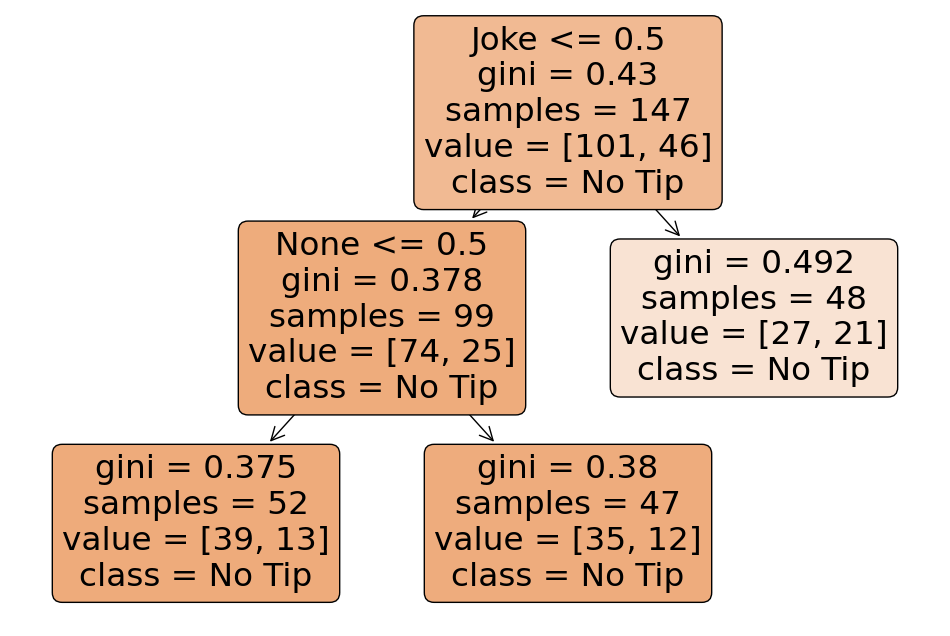

In [188]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No Tip', 'Tip'], filled=True, rounded=True)

plt.show()

In [189]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [190]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [191]:
decision_tree.predict([[0,0,1]])

C:\Python Folder\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [192]:
X_train

,Ad,Joke,None
198,1,0,0
65,1,0,0
122,0,0,1
180,0,0,1
31,0,0,1
...,...,...,...
106,1,0,0
14,0,1,0
92,0,1,0
179,0,0,1


In [193]:
X_train['None'].value_counts()

0    100
1     47
Name: None, dtype: int64

In [194]:
X_train['Ad'].value_counts()

0    95
1    52
Name: Ad, dtype: int64

In [137]:
X_train['Joke'].value_counts()

0    99
1    48
Name: Joke, dtype: int64

In [138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [144]:
X_train_balanced['None'].value_counts()

0    144
1     58
Name: None, dtype: int64

Ad  Joke  None
1   0     0       52
0   1     0       48
    0     1       47
dtype: int64